# **Lab 5: differential equations**
**Gustav Grevsten**

# **Abstract**

The purpose of this lab is to implement and test numerical methods for approximating solutions to differential equations. Specifically, it will focus on applying Euler's method to ordinary differential equations and simulating the trajectory of a stochastic differential equation. In the end, we conclude that Euler's method provides a stable and accurate solution for the tested equations for sufficiently small time-steps and that the stochastic differential equation follows the expected relation.

# **Set up environment**

In [100]:
# Load neccessary modules.
import numpy as np
import matplotlib.pyplot as plt

# **Introduction**

Time-step methods are numerical techniques used to solve ordinary differential equations (ODEs) by approximating the solution at discrete time points. In other words, instead of finding the exact solution of the ODE, we compute an approximation of the solution at specific points in time.

One of the simplest time-step methods is Euler's method. It works by approximating the value of the solution at the next time step based on the current value and the derivative of the solution at that point.

In essence, Euler's method assumes that the derivative of the solution is constant over each time step, which is not always accurate, especially for complex differential equations. However, it provides a simple and intuitive time-step method and serves as a starting point for more advanced techniques.

A stochastic differential equation (SDE) is a type of differential equation where the solution depends on both deterministic and random components.

To solve SDEs, numerical methods are often used, such as the Euler-Maruyama method. This method approximates the solution of the SDE at discrete time points by simulating the random component of the equation.

# **Method**

In this lab, we will implement Euler's method for solving initial value problems both for finding scalar solutions and for solutions to systems of equations. We will also implement a function for simulating the trajectory of a stochastic differential equation.

To apply Euler's method in this lab, we first discretize the time domain into a series of time steps. Then, we approximate the value of the solution at each time step using the following formula:

$u_{i+1} = u_i + \Delta t \cdot f(t_i, u_i)$

where $u_i$ is the approximate value of the solution at time $t_i = i \cdot \Delta t$ and $\Delta t$ is the time step size, $f(t_i, u_i)$ is the derivative of the solution $u$ evaluated at time $t_i$ and $u_i$. For this particular lab, we will be solving the equations in the interval $[0,T]$ with initital condition $u(0) = u_0$

The algorithm for Euler's method is implemented as python code below:

In [101]:
def forward_euler(T, f, u0, dt = 10**-3):
  t = 0
  U = []
  U.append(u0)
  for i in range(1, int(np.floor(T/dt))+1):
    u0 += dt*f(u0, (i-1)*dt)
    U.append(u0)
  return U

Euler's method can be applied in an analogous manner to systems of ODEs. In this case, we simply use a vector-valued function $u(t)=[u_1,u_2 ... u_n]^T$ with the initital value $u(0) = u_0$ and we solve the various differential equations $u_1$ to $u_n$ within the interval $[0,T]$ using Euler's method as per normal.

The algorithm for applying Euler's method to systems of ODEs is implemented as python code below:

In [102]:
def forward_euler_system(T, f, u0, dt = 10**-3):
  dim = len(u0)
  t = 0
  U = np.zeros((dim, int(np.floor(T/dt))+1))
  for k in range(dim):
    U[k,0] = u0[k]
  for i in range(1, int(np.floor(T/dt))+1):
    vals = u0.copy()
    for j in range(dim):
      u0[j] += dt*f(vals, (i-1)*dt)[j]
      U[j,i] = u0[j]
  return U

Finally, we wish to simulate the trajectory of a SDEs. For this, we implement the Euler-Maruyama method, which is an extention of Euler's method for the purpose of solving SDEs. The equation is

$dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t$

where $dW_t \sim N(0,dt)$ and $dX_t$ is the change in the function with each time step. In this case, we use the functions $\mu(X_t, t) = \mu \cdot X_t$ and $\sigma(X_t, t) = \sigma \cdot X_t$.

In [103]:
def stochastic(T, mu, sigma, x0, dt = 10**-3):
  t = 0
  sqrt_dt = np.sqrt(dt)
  U = []
  U.append(x0)
  for i in range(1, int(np.floor(T/dt))):
    W = np.random.normal(loc = 0.0, scale = sqrt_dt)
    x0 += mu * x0 * dt + sigma * x0 * W
    U.append(x0)
  return U

# **Results**

We test all of the algorithms presented in the Methods section below. To start, we test Euler's method for the function $\frac{du}{dt} = -2u$ with the exact solution $u(t) = e^{-2u}$ within the interval $[0,5]$:

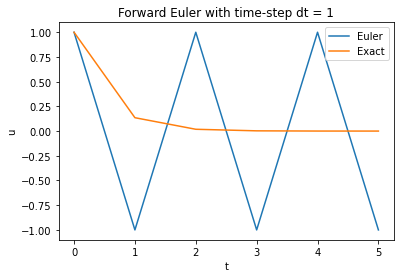

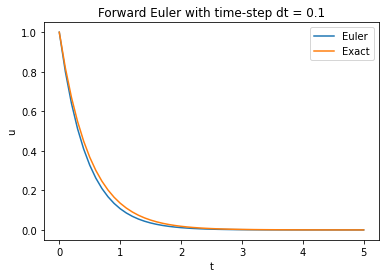

In [104]:
def u(t):
  return np.e**(-2*t)

def f(u, t):
  return -2*u

T, dt = 5, 1
u0 = u(0)
sol = forward_euler(T, f, u0, dt)
exact = []
t = np.linspace(0, T, int(np.floor(T/dt))+1)

for i in range(len(sol)):
  exact.append(u(i*dt))

plt.plot(t, sol, label = "Euler")
plt.plot(t, exact, label = "Exact")
plt.legend()
plt.title("Forward Euler with time-step dt = " + str(dt))
plt.xlabel("t")
plt.ylabel("u")
plt.show()

dt = 10**-1

sol = forward_euler(T, f, u0, dt)
exact = []
t = np.linspace(0, T, int(np.floor(T/dt))+1)

for i in range(len(sol)):
  exact.append(u(i*dt))

plt.plot(t, sol, label = "Euler")
plt.plot(t, exact, label = "Exact")
plt.legend()
plt.title("Forward Euler with time-step dt = " + str(dt))
plt.xlabel("t")
plt.ylabel("u")
plt.show()

As we can see, the solution is unstable for the time-step $\Delta t = 1$ but gives a significantly more stable and accurate solution for a time step $\Delta t = 0.1$.

Next, we will solve the system of differential equations $\frac{du}{dt}=[u_2,-u_1]^T$ with the exact solution $u(t)=[sin(t),cos(t)]^T$ within the interval $[0,10]$ using Euler's method:

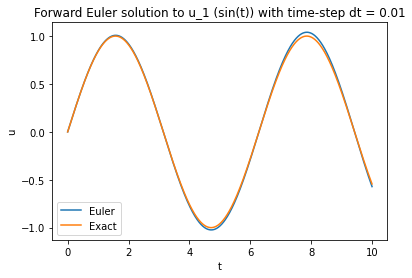

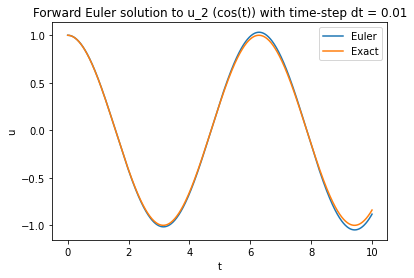

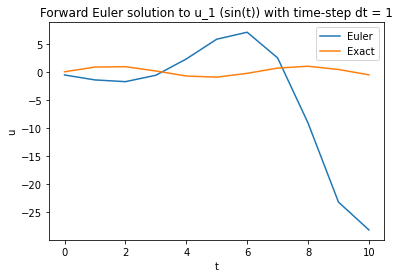

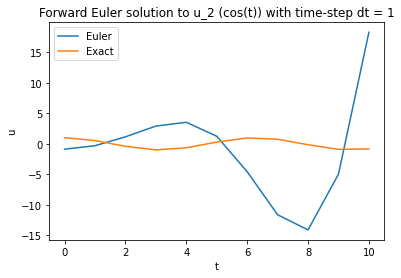

In [105]:
def u(t):
  return [np.sin(t), np.cos(t)]

def f(uv,t):
  u1, u2 = uv[0], uv[1]
  return [u2, -u1]

T, u0 = 10, [0,1]
dim = len(u0)

dt = 10**-2
sol = forward_euler_system(T, f, u0, dt)
exact = np.zeros((dim, int(np.floor(T/dt))+1))
t = np.linspace(0, T, int(np.floor(T/dt))+1)

for i in range(int(np.floor(T/dt))+1):
  exact[0,i] = u(i*dt)[0]
  exact[1,i] = u(i*dt)[1]

plt.plot(t, sol[0,:], label = "Euler")
plt.plot(t, exact[0,:], label = "Exact")
plt.legend()
plt.title("Forward Euler solution to u_1 (sin(t)) with time-step dt = " + str(dt))
plt.xlabel("t")
plt.ylabel("u")
plt.show()

plt.plot(t, sol[1,:], label = "Euler")
plt.plot(t, exact[1,:], label = "Exact")
plt.legend()
plt.title("Forward Euler solution to u_2 (cos(t)) with time-step dt = " + str(dt))
plt.xlabel("t")
plt.ylabel("u")
plt.show()

dt = 1
sol = forward_euler_system(T, f, u0, dt)
exact = np.zeros((dim, int(np.floor(T/dt))+1))
t = np.linspace(0, T, int(np.floor(T/dt))+1)

for i in range(int(np.floor(T/dt))+1):
  exact[0,i] = u(i*dt)[0]
  exact[1,i] = u(i*dt)[1]

plt.plot(t, sol[0,:], label = "Euler")
plt.plot(t, exact[0,:], label = "Exact")
plt.legend()
plt.title("Forward Euler solution to u_1 (sin(t)) with time-step dt = " + str(dt))
plt.xlabel("t")
plt.ylabel("u")
plt.show()

plt.plot(t, sol[1,:], label = "Euler")
plt.plot(t, exact[1,:], label = "Exact")
plt.legend()
plt.title("Forward Euler solution to u_2 (cos(t)) with time-step dt = " + str(dt))
plt.xlabel("t")
plt.ylabel("u")
plt.show()

As we can see, the solutions for this system of equations is also accurate and stable for sufficiently small timesteps $\Delta t$, but is unstable for larger timesteps.

Finally, we test the simulation of the stochastic differential equation using the variables $\sigma = 0.1, \mu = 1$ and $dt = 0.01$. We simulate a few trajectories on the interval $[0,10]$ and check that the average values of the trajectories roughly follow the relation  $E[X_t] = X_0e^{\mu t}$:

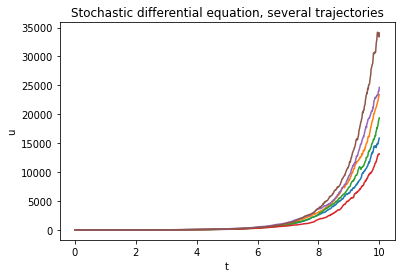

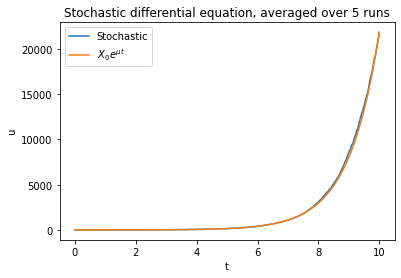

In [88]:
T, x0, dt, mu, sigma = 10, 1, 10**-2, 1, 0.1
t = np.linspace(0, T, int(np.floor(T/dt)))


for i in range(6):
  sol = stochastic(T, mu, sigma, x0, dt)
  plt.plot(t, sol, label = "Stochastic")
plt.title("Stochastic differential equation, several trajectories")
plt.xlabel("t")
plt.ylabel("u")
plt.show()

average_sol = []
exact = []
runs = 5

for i in range(runs):
  sol = stochastic(T, mu, sigma, x0, dt)
  for j in range(len(sol)):
    if i == 0:
      average_sol.append(sol[j])
    else:
      average_sol[j] += sol[j]

average_sol = (1/runs)*np.array(average_sol)

for i in range(len(sol)):
  exact.append(x0*np.e**(mu*i*dt))

plt.plot(t, average_sol, label = "Stochastic")
plt.plot(t, exact, label  = r'$X_0e^{\mu t}$')
plt.legend()
plt.title("Stochastic differential equation, averaged over " + str(runs) + " runs")
plt.xlabel("t")
plt.ylabel("u")
plt.show()

As we can see, the trajectories differ for each run and the average of the various solutions holds close to the function $X_0e^{\mu t}$.

# **Discussion**

As expected, Euler's method provided accurate and stable solutions to the differential equations for sufficiently small time-steps. It is important to remember that Euler's method is very crude compared to more advanced methods, and should likely not be used for more advanced problems where high degrees of accuracy are required with relatively short computation times. Euler's method is also poor at conserving energy, which is a limitation in physics simulations.

The stochastic trajectories that were simulated can be seen to diverge from one another, although the average of the various solutions tended rather quickly towards the expected value $X_0e^{\mu t}$. Naturally, being based on Euler's method, the Euler-Maruyama method should also be used with some degree of restrain.